In [1]:
import pandas as pd

# Load dataset
cancer_df = pd.read_csv('Breast_Cancer.csv')
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Silhouette Score: 0.34
Davies Bouldin Index: 1.31


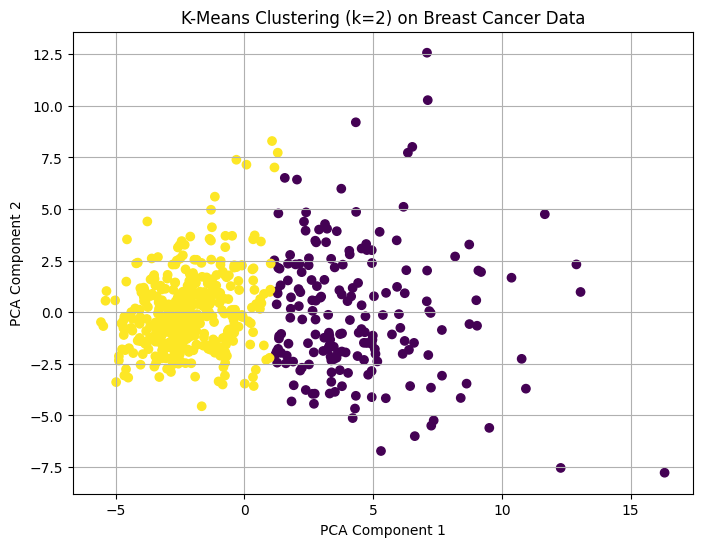

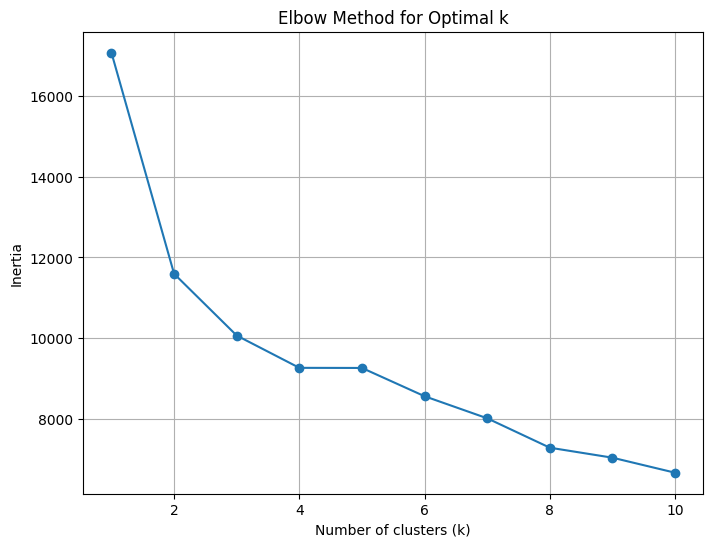

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Load dataset
df = pd.read_csv('Breast_Cancer.csv')

# Drop irrelevant columns
df.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1, inplace=True)

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Apply KMeans with k=2
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(scaled_data)

# Evaluate clustering
sil_score = silhouette_score(scaled_data, labels)
db_index = davies_bouldin_score(scaled_data, labels)
print(f"Silhouette Score: {sil_score:.2f}")
print(f"Davies Bouldin Index: {db_index:.2f}")

# Visualize clusters using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='viridis')
plt.title('K-Means Clustering (k=2) on Breast Cancer Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

# Elbow method to find optimal k
inertia = []
k_range = range(1, 11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()
